In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numba

In [3]:
#loading data
path = '/content/finitput.txt'
finitput = np.loadtxt(path)
finitput = np.transpose(finitput)

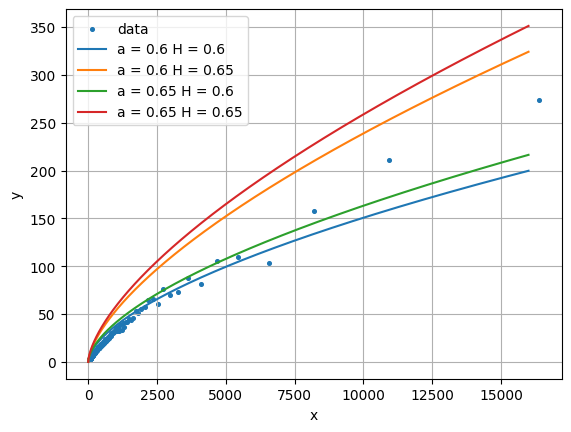

In [4]:
#visualizing range of a & H
a1, H1 = .6, .6
a2, H2 = .65, .65
xs = np.arange(16000)

y11 = a1 * xs**H1
y22 = a2 * xs**H2
y12 = a1 * xs**H2
y21 = a2 * xs**H1

plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.scatter(finitput[0], finitput[1], s=7, label = 'data')
plt.plot(xs, y11, label = 'a = {} H = {}'.format(a1,H1))
plt.plot(xs, y12, label = 'a = {} H = {}'.format(a1,H2))
plt.plot(xs, y21, label = 'a = {} H = {}'.format(a2,H1))
plt.plot(xs, y22, label = 'a = {} H = {}'.format(a2,H2))
plt.legend()

In [5]:
@numba.njit
# functions

def Y_theory(x, a, H):
  return a*x**H

def Chi2(a, H, x, y):

  Y_th = Y_theory(x, a, H)
  X = np.sum((y - Y_th)**2)

  return X

def new_theta(sigma_a, sigma_H, a_old, H_old):
  da = np.random.normal(0, sigma_a)
  dH = np.random.normal(0, sigma_H)
  a_new = a_old + da
  H_new = H_old + dH
  if a_new!=0 and H_new!=0:
    return a_new, H_new
  else:
    return a_old, H_old

def switch(a_old, H_old, a_new, H_new, x, y):
  delta_X2 = Chi2(a_new, H_new, x, y) - Chi2(a_old, H_old, x, y)
  AR = min(1,np.exp(-delta_X2/2))
  r = np.random.random()

  if r<AR:
     return a_new, H_new
  elif r>AR:
     return a_old, H_old

def MCMC(n_step, a_init, H_init, x, y, sigma_a, sigma_H):
  a_old = a_init
  H_old = H_init
  X = np.array([])
  a = np.array([])
  H = np.array([])

  for i in range(n_step):

    a = np.append(a, a_old)
    H = np.append(H, H_old)
    X = np.append(X, Chi2(a_old, H_old, x, y))
    a_new, H_new = new_theta(sigma_a, sigma_H, a_old, H_old)
    a_old, H_old = switch(a_old, H_old, a_new, H_new, x, y)

  return a, H, X




In [6]:
for i in range(10):
  a, H, X = MCMC(10000, .6, .6, finitput[0], finitput[1], 0.001, 0.001)
  print(a[-1], H[-1])

0.1505737434644107 0.7720821956980853
0.14729314455967607 0.7746661997001911
0.1504019629778989 0.7722155843837314
0.15108182147580582 0.7715069688780455
0.14942186714996672 0.7731536715427683
0.14919154231248657 0.7731543867917162
0.15052846448526555 0.7724988767768197
0.14752155285096744 0.7743332308685982
0.14915099871642135 0.7738583705651396
0.1490252295316503 0.7738173630204053


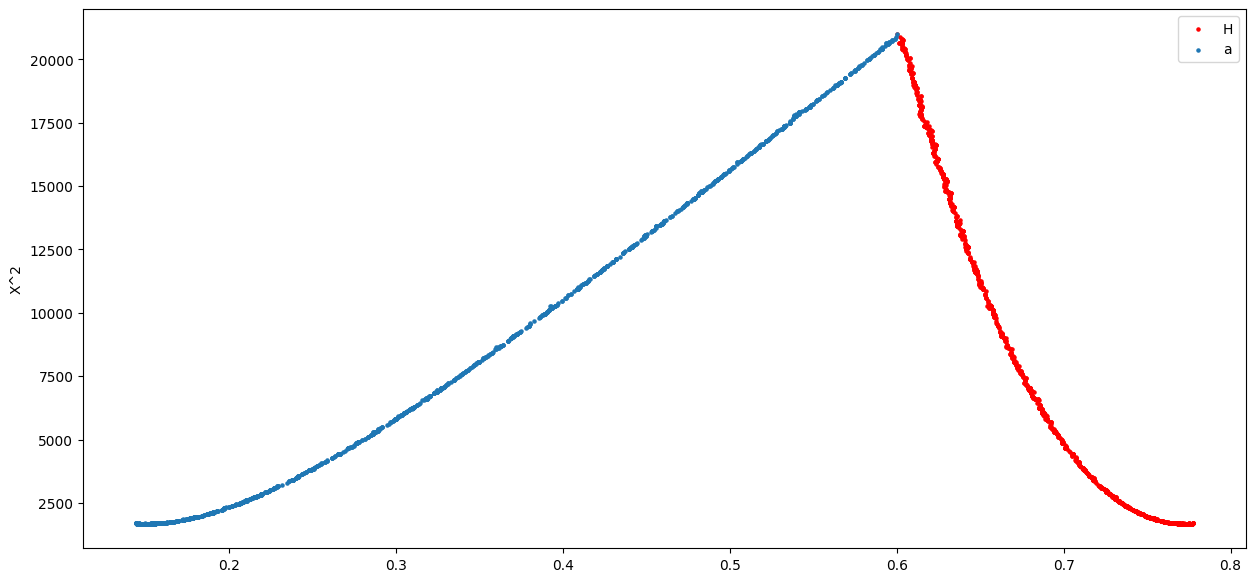

In [ ]:
plt.figure(figsize = (15,7))
plt.ylabel('X^2')
plt.scatter(H, X, s=5, label = 'H', color ='r')
plt.scatter(a, X, s=5, label = 'a')
plt.legend()

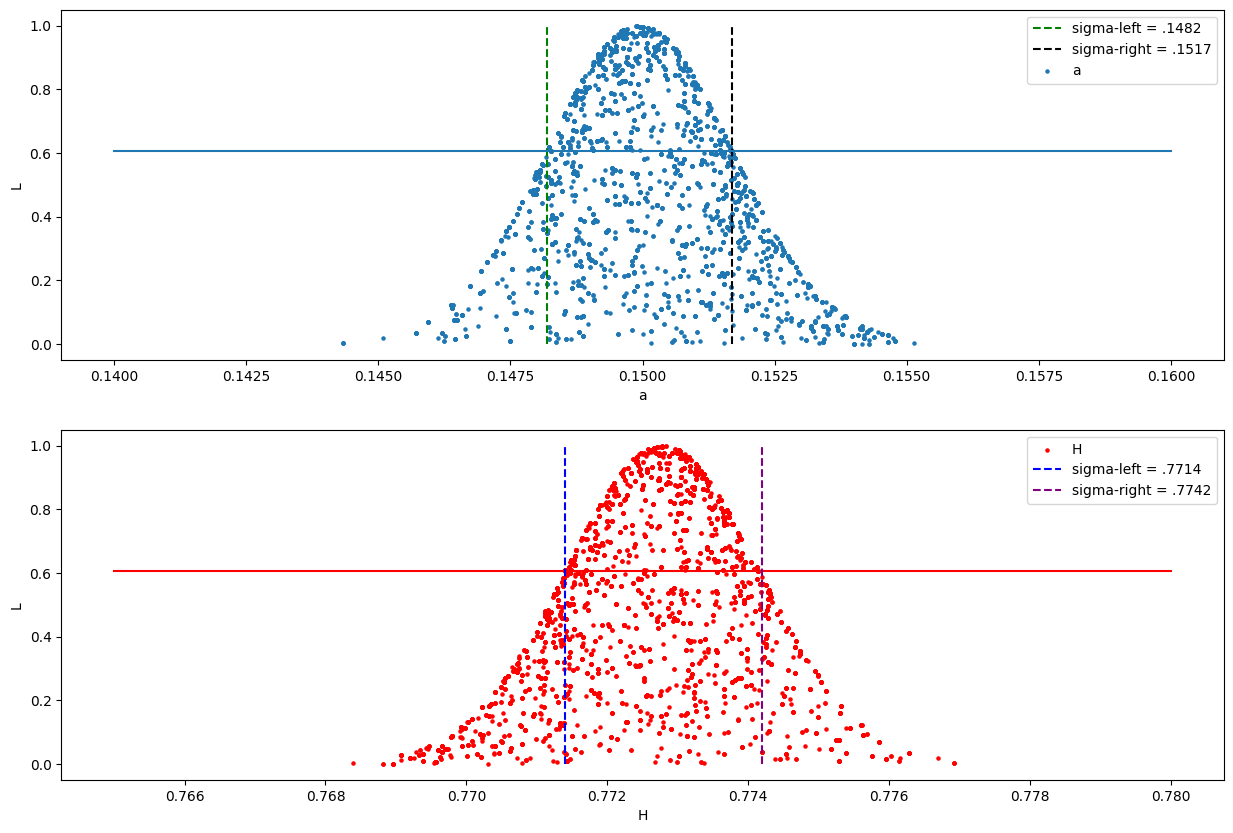

In [24]:
fig, ax = plt.subplots(2)
fig.set_figwidth(15)
fig.set_figheight(10)
ax[0].set(xlabel = 'a', ylabel = 'L')
ax[1].set(xlabel = 'H', ylabel = 'L')
L = np.exp(-(X-min(X))/2)
ax[1].scatter(H[5000:], L[5000:], s=5, label = 'H', color ='r')
ax[0].vlines(.1482, 0, 1, linestyles='dashed', color='green', label ='sigma-left = .1482')
ax[0].vlines(.1517, 0, 1, linestyles='dashed', color='black', label='sigma-right = .1517')
ax[0].plot(np.linspace(.14,.16, 1000), [.606]*1000)
ax[0].scatter(a[5000:], L[5000:], s=5, label = 'a')
ax[1].plot(np.linspace(.765,.78, 1000), [.606]*1000, color='red')
ax[1].vlines(.7714, 0, 1, linestyles='dashed', color='blue', label='sigma-left = .7714')
ax[1].vlines(.7742, 0, 1, linestyles='dashed', color='purple', label='sigma-right = .7742')
ax[1].legend()
ax[0].legend()


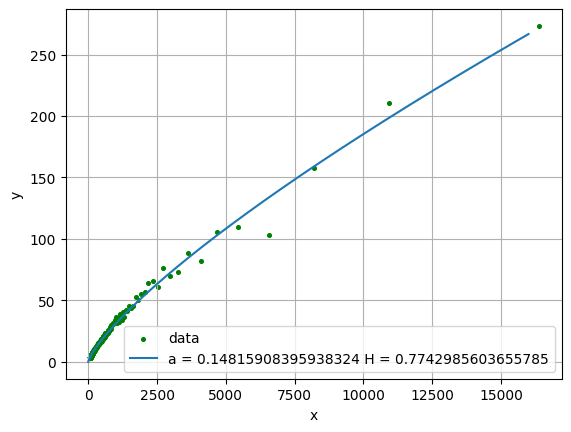

In [ ]:
a1, H1 = a[-1], H[-1]

xs = np.arange(16000)

y11 = a1 * xs**H1

plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.scatter(finitput[0], finitput[1], s=7, color='g', label='data')
plt.plot(xs, y11, label = 'a = {} H = {}'.format(a1,H1))
plt.legend()